<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;"><a href="http://www.editorialuoc.cat/mineria-de-datos" target="_blank">Minería de datos: Modelos y algoritmos</a></p>
<p style="margin: 0; text-align:right;">Estudios de Informática, Multimedia y Telecomunicación</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Universitat Oberta de Catalunya (<b>UOC</b>)</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>

# CH13EJ6 Creación de arbol de decisión y mejora con PCA

En este ejemplo se muestra como usar PCA para mejorar la clasificación de un conjunto de datos [Breast Cancer Wisconsin (Diagnostic) Data Set](https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)).

## 1. Instalar los packages necesarios 

In [1]:
if(!require(car)){
    install.packages('car',repos='http://cran.es.r-project.org')
    require(car)
}
if(!require(C50)){
    install.packages('C50',repos='http://cran.es.r-project.org')
    require(C50)
}
if(!require(gmodels)){
    install.packages('gmodels',repos='http://cran.es.r-project.org')
    require(gmodels)
}
set.seed(606);

Loading required package: car

Warning message:
“package ‘car’ was built under R version 3.5.2”
Loading required package: carData

Warning message:
“package ‘carData’ was built under R version 3.5.2”
Loading required package: C50

Loading required package: gmodels



## 2. Carga del dataset

Leer el conjunto de datos original desde su URL en el repositorio **UCI Machine Learning**.

In [2]:
wdbc=read.table(
    url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"), 
    sep=",", header=FALSE)

### Obtener las dimensiones (N y d) del conjunto de datos

In [3]:
head(wdbc)
dim(wdbc)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
1,1000025,5,1,1,1,2,1,3,1,1,2
2,1002945,5,4,4,5,7,10,3,2,1,2
3,1015425,3,1,1,1,2,2,3,1,1,2
4,1016277,6,8,8,1,3,4,3,7,1,2
5,1017023,4,1,1,3,2,1,3,1,1,2
6,1017122,8,10,10,8,7,10,9,7,1,4


[1] 699  11

### Manipulación de datos

Correcciones que se aplicarán a los datos:
- Recodificar los '?' por NA 
- Filtrar los valores ausentes, i.e. quedarse solo con los registros completos

In [3]:
wdbc$V7=as.numeric(recode(wdbc$V7, "'?'=NA"))

x=wdbc[complete.cases(wdbc),]

### Partición del dataset

Particionar el conjunto de entrada en dos (training y test set), según la regla del 2/3

In [5]:
N=dim(x)[1]
all=seq(1,N)

# seleccionar 2/3 al azar
train=sort(sample(N,N*2/3.0))
test=setdiff(all,train)

xtrain=x[train,]
xtest=x[test,]

Revisar que haya una representación parecida en la variable clasificadora del conjunto de entreno y test

In [6]:
prop.table(table(xtrain$V11))
prop.table(table(xtest$V11))


        2         4 
0.6571429 0.3428571 


        2         4 
0.6359649 0.3640351 

## 3. Creación del primer árbol

Crear un primer árbol usando todos los parámetros por defecto y dibujarlo


Call:
C5.0.default(x = xtrain[, c(2:10)], y = as.factor(xtrain$V11))

Classification Tree
Number of samples: 455 
Number of predictors: 9 

Tree size: 6 

Non-standard options: attempt to group attributes



Call:
C5.0.default(x = xtrain[, c(2:10)], y = as.factor(xtrain$V11))


C5.0 [Release 2.07 GPL Edition]  	Tue Oct 20 17:07:08 2020
-------------------------------

Class specified by attribute `outcome'

Read 455 cases (10 attributes) from undefined.data

Decision tree:

V3 <= 2:
:...V7 <= 1: 2 (255/1)
:   V7 > 1:
:   :...V2 <= 6: 2 (25/2)
:       V2 > 6: 4 (3)
V3 > 2:
:...V7 > 1: 4 (149/8)
    V7 <= 1:
    :...V3 <= 3: 2 (12)
        V3 > 3: 4 (11/2)


Evaluation on training data (455 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     6   13( 2.9%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   289    10    (a): class 2
	     3   153    (b): class 4


	Attribute usage:

	100.00%	V3
	100.00%	V7
	  6.15%	V2


Time: 0.0 secs


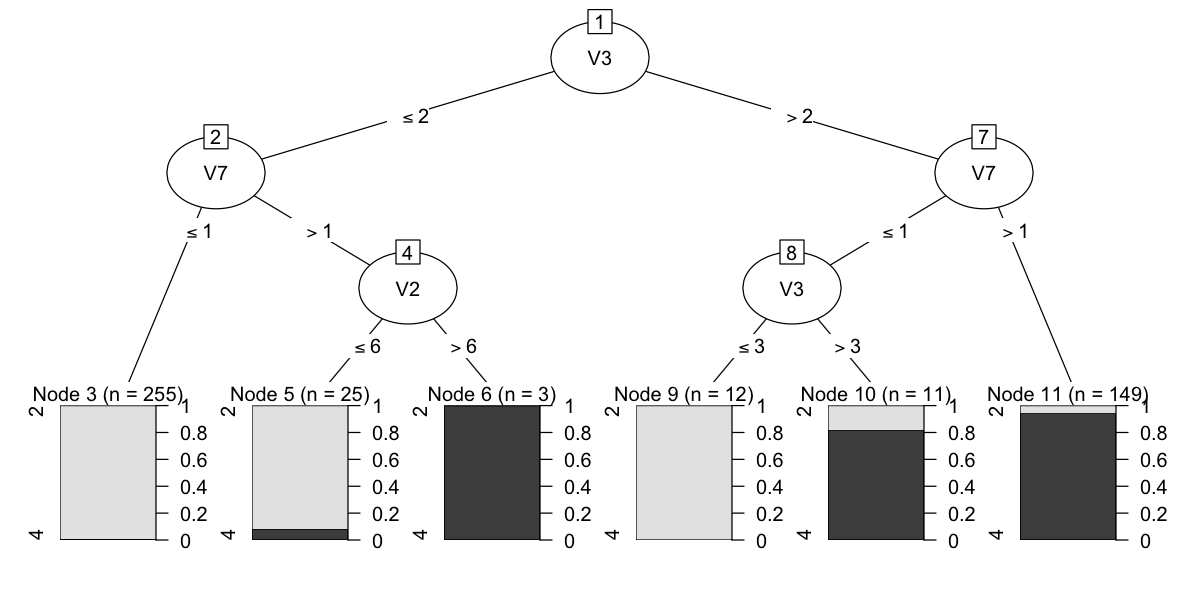

In [7]:
model1 <- C50::C5.0(xtrain[,c(2:10)],as.factor(xtrain$V11))
model1
summary(model1)
options(repr.plot.width=10, repr.plot.height=5)
plot(model1)

### Evaluar el árbol creado mediante la matriz de confusión para cada subconjunto

In [8]:
V11_pred <- predict(model1, xtest)
CrossTable(xtest$V11,V11_pred,prop.chisq=FALSE,prop.c=FALSE,prop.r=FALSE,dnn = c('actual V11','predicted V11'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  228 

 
             | predicted V11 
  actual V11 |         2 |         4 | Row Total | 
-------------|-----------|-----------|-----------|
           2 |       136 |         9 |       145 | 
             |     0.596 |     0.039 |           | 
-------------|-----------|-----------|-----------|
           4 |         3 |        80 |        83 | 
             |     0.013 |     0.351 |           | 
-------------|-----------|-----------|-----------|
Column Total |       139 |        89 |       228 | 
-------------|-----------|-----------|-----------|

 


El **error del árbol es del 0,07**. Sólo 16 casos clasifican incorrectamente. 

Veamos si es mejorable con la técnica de PCA.

## 4. PCA

Utilizar PCA para extraer características, analizando el número de componentes.

In [9]:
TipoCancer <- xtrain[,11]
VarCancer <- xtrain[,2:10]

pcaVarCancer <- princomp(VarCancer)
summary(pcaVarCancer) 

Importance of components:
                          Comp.1     Comp.2     Comp.3    Comp.4     Comp.5
Standard deviation     6.4690496 2.07938452 1.96040844 1.7081162 1.66343185
Proportion of Variance 0.6713021 0.06935961 0.06164959 0.0468028 0.04438611
Cumulative Proportion  0.6713021 0.74066173 0.80231132 0.8491141 0.89350023
                           Comp.6     Comp.7     Comp.8     Comp.9
Standard deviation     1.61979548 1.31447411 1.19395660 0.92845281
Proportion of Variance 0.04208792 0.02771667 0.02286726 0.01382792
Cumulative Proportion  0.93558815 0.96330482 0.98617208 1.00000000

Examinada la desviación estándard, la proporción de la varianza y varianza acumulada escogemos el primer componente para intentar mejorar nuestro modelo.

### Añadir una nueva variable C1 a los datos usando el primer componente calculado

In [10]:
xtrain$C1=predict(pcaVarCancer,xtrain[,2:11])[,1]
xtest$C1=predict(pcaVarCancer,xtest[,2:11])[,1]

## 5. Creación del segundo árbol 

Crear un segundo árbol con la nueva variable usando todos los parámetros por defecto y dibujarlo


Call:
C5.0.default(x = xtrain[, c(2:10, 12)], y = as.factor(xtrain$V11))

Classification Tree
Number of samples: 455 
Number of predictors: 10 

Tree size: 5 

Non-standard options: attempt to group attributes



Call:
C5.0.default(x = xtrain[, c(2:10, 12)], y = as.factor(xtrain$V11))


C5.0 [Release 2.07 GPL Edition]  	Tue Oct 20 17:08:45 2020
-------------------------------

Class specified by attribute `outcome'

Read 455 cases (11 attributes) from undefined.data

Decision tree:

C1 <= -1.060818: 2 (287/1)
C1 > -1.060818:
:...C1 > 3.516298: 4 (127/2)
    C1 <= 3.516298:
    :...V9 <= 4: 4 (31/4)
        V9 > 4:
        :...V2 <= 7: 2 (7)
            V2 > 7: 4 (3)


Evaluation on training data (455 cases):

	    Decision Tree   
	  ----------------  
	  Size      Errors  

	     5    7( 1.5%)   <<


	   (a)   (b)    <-classified as
	  ----  ----
	   293     6    (a): class 2
	     1   155    (b): class 4


	Attribute usage:

	100.00%	C1
	  9.01%	V9
	  2.20%	V2


Time: 0.0 secs


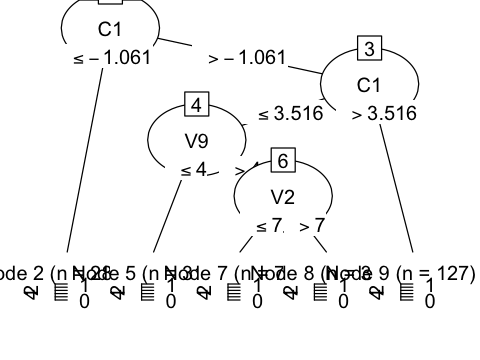

In [11]:
model2 <- C50::C5.0(xtrain[,c(2:10,12)],as.factor(xtrain$V11))
model2
summary(model2)
options(repr.plot.width=4, repr.plot.height=3)
plot(model2)

Observar que para la creación el árbol solo se ha usado la variable que corresponde con el componente 1. El resto de variables se ha descartado.

### Evaluar el árbol creado mediante la matriz de confusión para cada subconjunto

In [12]:
V11_pred <- predict(model2, xtest)
CrossTable(xtest$V11,V11_pred,prop.chisq=FALSE,prop.c=FALSE,prop.r=FALSE,dnn = c('actual V11','predicted V11'))


 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  228 

 
             | predicted V11 
  actual V11 |         2 |         4 | Row Total | 
-------------|-----------|-----------|-----------|
           2 |       141 |         4 |       145 | 
             |     0.618 |     0.018 |           | 
-------------|-----------|-----------|-----------|
           4 |         4 |        79 |        83 | 
             |     0.018 |     0.346 |           | 
-------------|-----------|-----------|-----------|
Column Total |       145 |        83 |       228 | 
-------------|-----------|-----------|-----------|

 


Tenemos una tasa del **0,039 de error en clasificación**. Hemos logrado reducir las clasificaciones erroneas de tumor maligno a 0 manteniendose la misma tasa de falsos positivos.